In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches_df = pd.read_csv('/content/matches_cleaned.csv')
deliveries_df = pd.read_csv('/content/deliveries_cleaned (1).csv')

In [3]:
matches_df.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [4]:
deliveries_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,Not Out,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,No Extras,0.0,Not Out,NaN,NaN


In [5]:
merged_df = pd.merge(matches_df, deliveries_df, on='match_id', how='inner')

In [6]:
merged_df.shape

(87913, 36)

In [7]:
merged_df.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,Not Out,NaN,NaN
1,335982,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0.0,0.0,0.0,No Extras,0.0,Not Out,NaN,NaN


In [8]:
temp_df = merged_df[(merged_df['batting_team'] == merged_df['winner']) & (merged_df['inning'] == 1)][['match_id','batting_team','bowling_team','winner']]
len_of_batting = len(temp_df.groupby('match_id'))


In [9]:
temp_df = merged_df[(merged_df['bowling_team'] == merged_df['winner']) & (merged_df['inning'] == 1)][['match_id','batting_team','bowling_team','winner']]
len_of_bowling = len(temp_df.groupby('match_id'))

In [10]:
# # Percentage of winning for Teams who does 'batting' in 1st innings
total = len_of_batting + len_of_bowling
batting = (len_of_batting/total)*100
batting

45.799457994579946

In [11]:
# Percentage of winning for Teams who does 'bowling' in 1st innings
total = len_of_batting + len_of_bowling
bowling = (len_of_bowling/total)*100
bowling

54.20054200542005

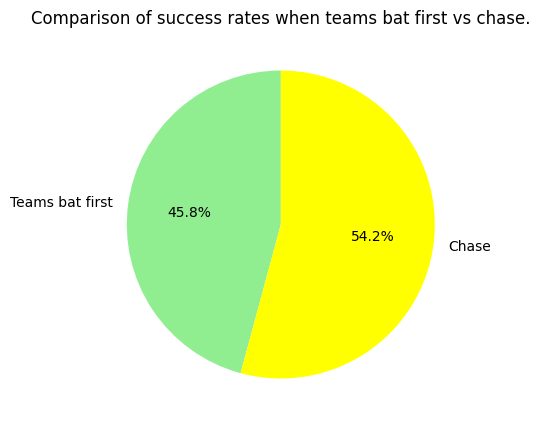

In [13]:
values = [batting,bowling]
plt.figure(figsize=(5, 5))
labels = ['Teams bat first', 'Chase']
plt.pie(values,labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'yellow'])
plt.title('Comparison of success rates when teams bat first vs chase.')
plt.show()

In [26]:
# Evaluate which venues are most favorable for batting or bowling
matches_df.sample(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
731,1178411,2019,Jaipur,2019-04-20,League,SPD Smith,Sawai Mansingh Stadium,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,5.0,162.0,20.0,N,NaN,S Ravi,YC Barde
634,1082649,2017,Bangalore,2017-05-19,Qualifier 2,KV Sharma,M Chinnaswamy Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,6.0,108.0,20.0,N,NaN,NJ Llong,Nitin Menon


In [23]:
best_for_batting = matches_df.groupby('venue')['target_runs'].mean().sort_values(ascending=False).head(2)
best_for_batting

,target_runs
venue,
"Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam",232.5
"Himachal Pradesh Cricket Association Stadium, Dharamsala",203.0


In [24]:
best_for_bowling = matches_df.groupby('venue')['target_runs'].mean().sort_values(ascending=False).tail(2)
best_for_bowling

,target_runs
venue,
OUTsurance Oval,136.000000
Newlands,133.142857


**Bowling Analysis**

In [28]:
# Top Wicket-Takers
deliveries_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,Not Out,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,No Extras,0.0,Not Out,NaN,NaN


In [32]:
deliveries_df.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(5)

,is_wicket
bowler,
SL Malinga,100.0
A Mishra,95.0
RP Singh,94.0
R Vinay Kumar,94.0
IK Pathan,88.0


In [38]:
# Economical Bowlers
economy = (deliveries_df.groupby('bowler')['total_runs'].sum())/((deliveries_df.groupby('bowler')['ball'].count())/6)
economy.sort_values().head(5)

,0
bowler,
S Rana,3.000000
AM Rahane,5.000000
SS Mundhe,5.142857
LA Carseldine,5.142857
DJ Thornely,5.454545


**Season Wise Analysis**

In [39]:
# Highest Run-Scoring Season
matches_df.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [44]:
highest_runs = matches_df.groupby('season')['target_runs'].sum().sort_values(ascending=False).head(10)
highest_runs

,target_runs
season,
2009,18429.0
2024,13532.0
2023,13388.0
2022,12737.0
2013,11924.0
2012,11732.0
2011,11091.0
2020,10230.0
2018,10212.0


<Axes: xlabel='season'>

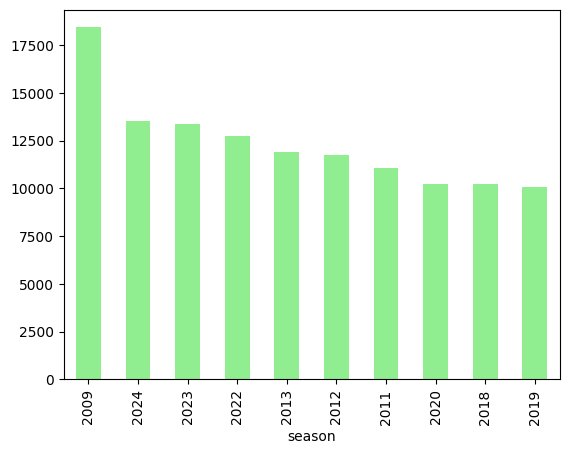

In [46]:
highest_runs.plot(kind='bar',color='lightgreen')

In [83]:
# Best Season for Teams
temp_df = matches_df.groupby(['season','winner'])['match_id'].count().reset_index()
temp_df.set_index('match_id')
temp_df.loc[temp_df.groupby('season')['match_id'].idxmax()]

,season,winner,match_id
6,2007,Rajasthan Royals,13
8,2009,Chennai Super Kings,17
16,2011,Chennai Super Kings,11
31,2012,Kolkata Knight Riders,12
40,2013,Mumbai Indians,13
47,2014,Kings XI Punjab,12
53,2015,Chennai Super Kings,10
69,2016,Sunrisers Hyderabad,11
74,2017,Mumbai Indians,12
78,2018,Chennai Super Kings,11


**Winners Distributions**

In [90]:
winners = (matches_df['winner'].value_counts()).head(10)

<Axes: ylabel='count'>

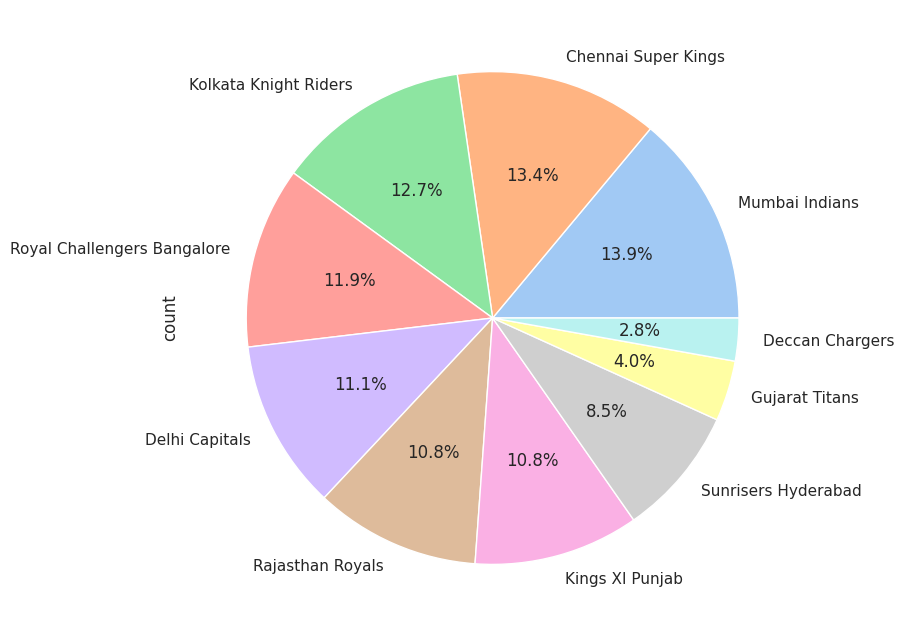

In [91]:
sns.set_theme(style='darkgrid')
winners.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8),colors=sns.color_palette('pastel'))

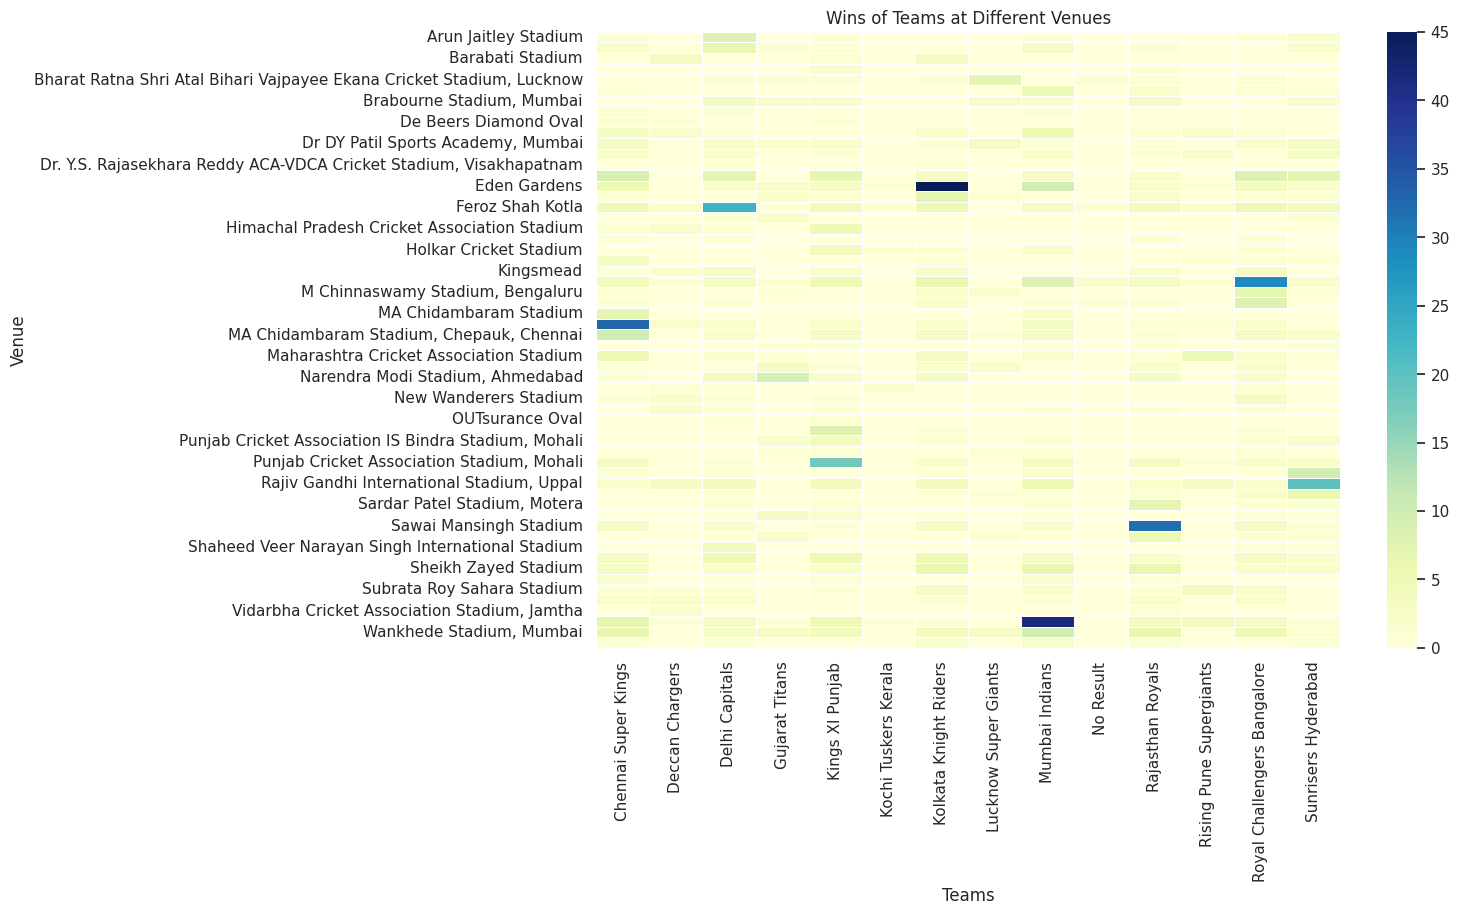

In [103]:
venue_team = matches_df.pivot_table(values='match_id', index='venue', columns='winner', aggfunc='count', fill_value=0)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(venue_team, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title('Wins of Teams at Different Venues')
plt.ylabel('Venue')
plt.xlabel('Teams')
plt.show()